In [1]:
import pandas as pd
import os

# Mount Google Drive if your files are stored there
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the folder containing your CSV files
folder_path = '/content/drive/MyDrive/Wheat data'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize empty lists to store latitude and longitude
all_latitudes = []
all_longitudes = []

# Initialize an empty DataFrame to store cleaned data
cleaned_data = pd.DataFrame()

# Iterate through all CSV files
for csv_file in csv_files:
    # Read each CSV file
    file_path = os.path.join(folder_path, csv_file)
    original_data = pd.read_csv(file_path)
    #filtered_data = original_data[original_data['pixelvalue'].isin([0.2, 0.3,0.1,0.4])]

 #   original_data['pixelvalue'] = original_data['pixelvalue'].round(5)

    # Remove duplicate rows based on all columns
  #  original_data = original_data.drop_duplicates()
#cleaned_data_final = pd.read_csv('cleaned_data_final_no_duplicates.csv')
filtered_data= original_data

#filtered_data = filtered_data.drop_duplicates(subset=['latitude','longitude','pixelvalue'])
filtered_data = filtered_data.drop_duplicates(subset=['latitude'])
filtered_data = filtered_data.drop_duplicates(subset=['longitude'])
filtered_data = filtered_data.drop_duplicates(subset=['pixelvalue'])
# Remove duplicate rows based on all columns
filtered_data = filtered_data.drop_duplicates()
# Display or save the resulting DataFrame
print(filtered_data)
# Save to a new CSV file if needed
filtered_data.to_csv('filtered_data1.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           latitude  longitude  pixelvalue
0         19.970263  73.662371      0.0746
129       19.970263  73.661955      0.1644
2025      19.970263  73.661955      0.1945
7762      19.970263  73.661955      0.1995
9646      19.970263  73.661955      0.1896
...             ...        ...         ...
11402109  19.970446  73.661975      0.0384
11406954  19.970446  73.661974      0.0401
11630893  19.970435  73.661963      0.0095
11644353  19.970434  73.661962      0.1225
11666354  19.970433  73.661961      0.1587

[637 rows x 3 columns]


In [2]:
pip install simplekml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=96d391ddd8d530a2fd53a1184f952b7693713351c1830ef82938d6e5aab8a49b
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


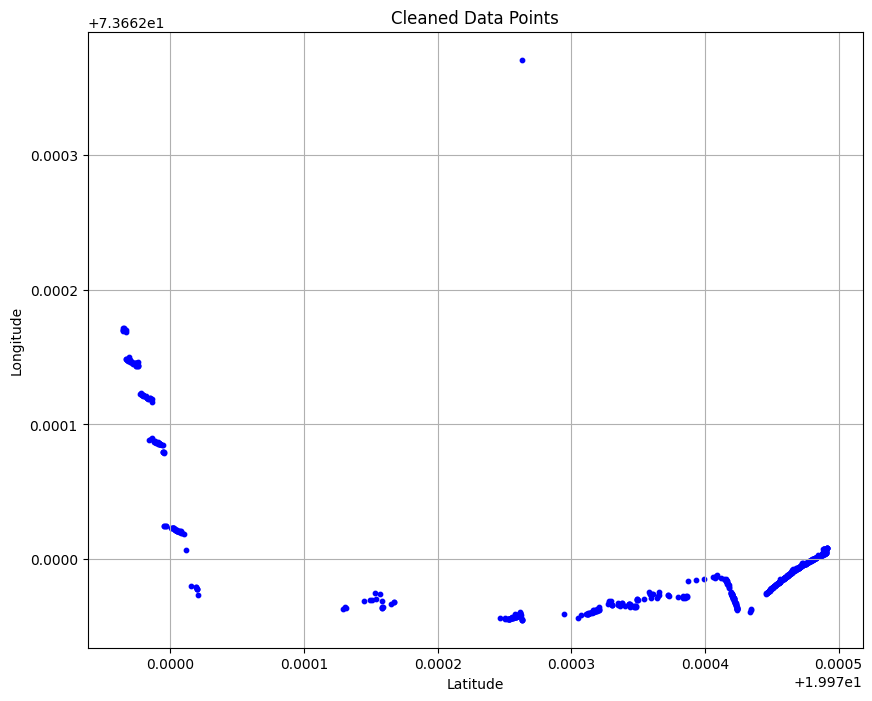

In [3]:
# Assuming 'cleaned_data.csv' contains the cleaned data
cleaned_data = pd.read_csv('filtered_data1.csv')
import matplotlib.pyplot as plt

# Plot the cleaned data points
plt.figure(figsize=(10, 8))
plt.scatter(cleaned_data['latitude'], cleaned_data['longitude'], s=10, c='blue', marker='o')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Cleaned Data Points')
plt.grid(True)
plt.show()

import simplekml
# Create KML object
kml_cleaned_data = simplekml.Kml()

# Add placemarks for each data point in the cleaned data
for index, row in cleaned_data.iterrows():
    kml_cleaned_data.newpoint(coords=[(row['longitude'], row['latitude'])])

# Save KML file for the cleaned data
kml_cleaned_data.save('cleaned_data.kml')


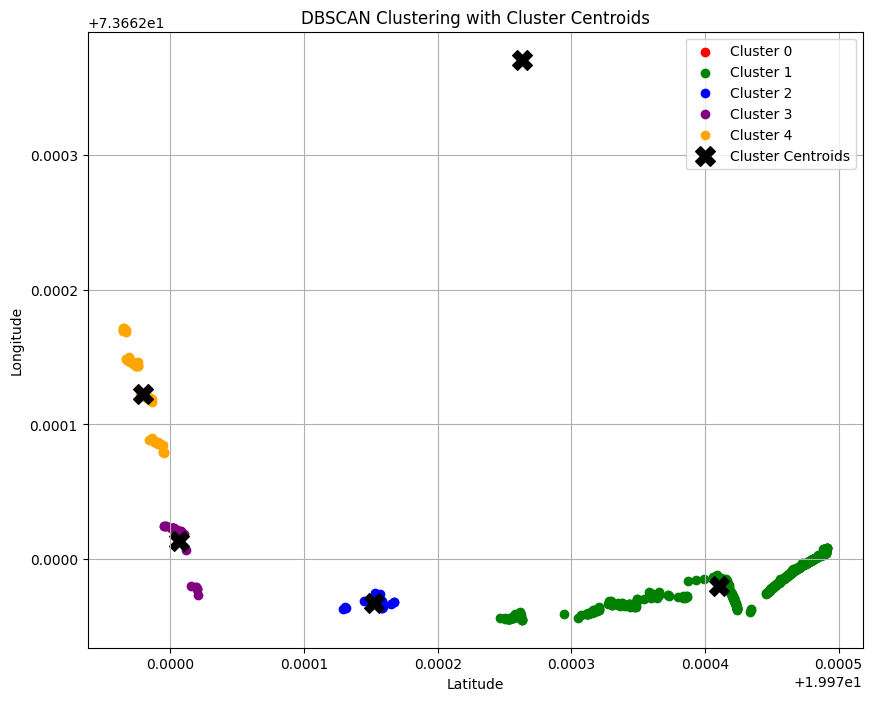

Number of clusters: 5
Cluster Centroids:
          latitude  longitude
cluster                      
0        19.970263  73.662371
1        19.970411  73.661980
2        19.970153  73.661967
3        19.970007  73.662013
4        19.969980  73.662123


In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('filtered_data1.csv')

# Extract latitude and longitude columns
coordinates = data[['latitude', 'longitude']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.000035, min_samples=1)
data['cluster'] = dbscan.fit_predict(coordinates)
# Find cluster centroids
cluster_centroids = data.groupby('cluster')[['latitude', 'longitude']].mean()

# Plot clusters with different colors
plt.figure(figsize=(10, 8))
for cluster_label, color in zip(data['cluster'].unique(), ['red', 'green', 'blue', 'purple', 'orange']):
    cluster_points = data[data['cluster'] == cluster_label]
    plt.scatter(cluster_points['latitude'], cluster_points['longitude'], c=color, label=f'Cluster {cluster_label}')

# Plot cluster centroids
plt.scatter(cluster_centroids['latitude'], cluster_centroids['longitude'], c='black', marker='X', label='Cluster Centroids', s=200)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering with Cluster Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Display number of clusters
num_clusters = len(data['cluster'].unique())
print(f'Number of clusters: {num_clusters}')

# Display cluster centroids
print('Cluster Centroids:')
print(cluster_centroids)

cluster_centroids.to_csv('cluster_centroids.csv', index=False)


Distances:


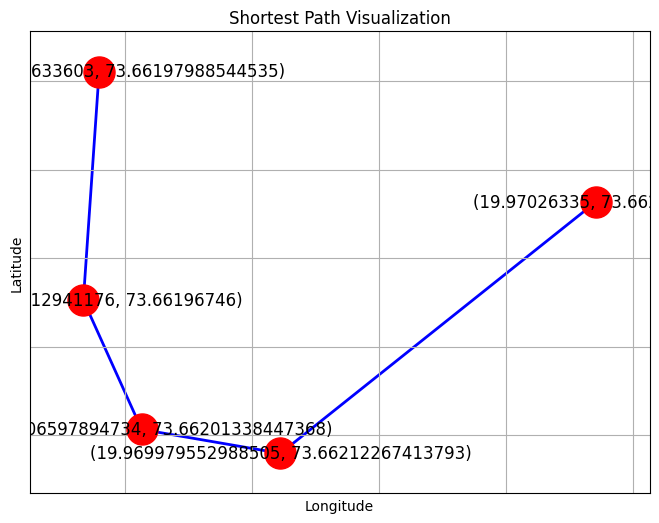

KML file saved: shortest_path.kml


In [6]:
import csv
import math
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import simplekml

# Function to calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Load coordinates from CSV file
def load_coordinates_from_csv(file_path):
    coordinates = {}
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            latitude, longitude = map(float, row)
            coordinates[(latitude, longitude)] = None  # Replace 'None' with your pixel_value if available
    return coordinates

# Path to your CSV file containing coordinates
csv_file_path = 'cluster_centroids.csv'

# Load coordinates from CSV file
points = load_coordinates_from_csv(csv_file_path)

# Calculate distances between each pair of points
distances = {}
for p1, p2 in itertools.permutations(points.keys(), 2):
    distances[(p1, p2)] = calculate_distance(p1, p2)

# Initialize variables for shortest path
shortest_distance = float('inf')
shortest_path = None

# Find the shortest path among all visitation orders
for order in itertools.permutations(points.keys()):
    total_distance = 0
    for i in range(len(order) - 1):
        total_distance += distances[(order[i], order[i + 1])]

    # Check if the total distance of the current order is shorter
    # If so, update the shortest distance and path
    if total_distance < shortest_distance:
        shortest_distance = total_distance
        shortest_path = order

# Print distances between each other
print("Distances:")
for point1 in points:
    for point2 in points:
        if point1 != point2:
            dist = distances[(point1, point2)]
      #      print(f"({point1[0]}, {point1[1]}) to ({point2[0]}, {point2[1]}): {dist:.6f}")

# Print the shortest path sequence
#print("\nShortest Path Sequence:")
#for point in shortest_path:
#    print(f"({point[0]}, {point[1]})", end=" -> ")
#print("\nShortest Distance:", shortest_distance)

# Create a graph
G = nx.Graph()

# Add nodes for each point
G.add_nodes_from(points.keys())

# Add edges based on the shortest path sequence
for i in range(len(shortest_path) - 1):
    G.add_edge(shortest_path[i], shortest_path[i + 1])

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw nodes
pos = {point: (point[1], point[0]) for point in points.keys()}  # Reversed coordinates for plotting
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='blue', width=2)

# Draw labels (point names)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title('Shortest Path Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(visible=True)
plt.show()

kml = simplekml.Kml()

# Add points to KML
for point in points.keys():
    kml.newpoint(name='', coords=[(point[1], point[0])])  # Reversed coordinates for KML format

# Add line for the shortest path to KML
line_coords = [(point[1], point[0]) for point in shortest_path]
kml.newlinestring(name='Shortest Path', coords=line_coords)

# Save KML file
kml_file_path = 'shortest_path.kml'
kml.save(kml_file_path)

print(f'KML file saved: {kml_file_path}')
